In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = '/content/drive/MyDrive/Colab Notebooks/Time-Wasters on Social Media.csv'
df = pd.read_csv(file_path)

df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

In [ ]:
df.isnull().sum()

,0
UserID,0
Age,0
Gender,0
Location,0
Income,0
Debt,0
Owns Property,0
Profession,0
Demographics,0
Platform,0


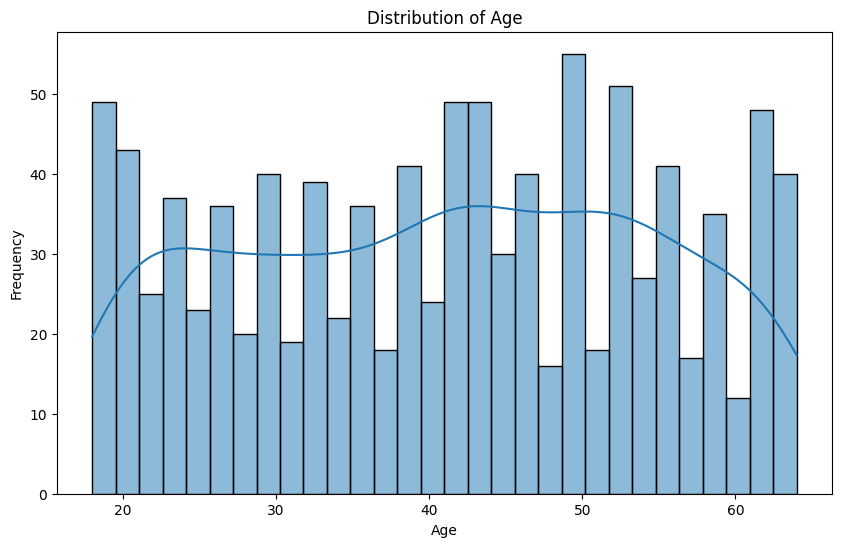

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

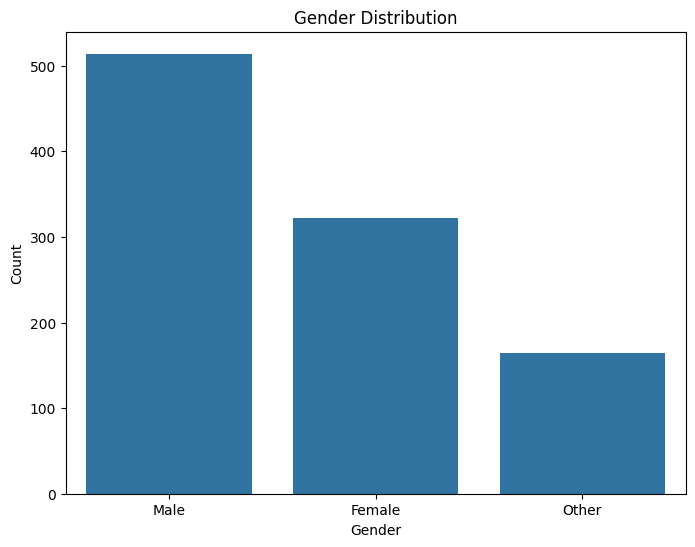

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Time-Wasters on Social Media (1).csv')

data

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,Male,India,74254,True,True,Students,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,5:45 PM,10,0,At work,Mobile Data
996,997,40,Female,Pakistan,27006,False,False,Waiting staff,Urban,Facebook,...,8,2,Boredom,Smartphone,MacOS,10:15 PM,10,0,At home,Mobile Data
997,998,27,Male,India,94218,True,True,Waiting staff,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,10:15 PM,10,0,Commuting,Mobile Data
998,999,61,Male,Pakistan,85344,True,False,Students,Urban,YouTube,...,3,7,Procrastination,Smartphone,MacOS,10:15 PM,5,5,At work,Wi-Fi


In [5]:
data.isnull().sum()

,0
UserID,0
Age,0
Gender,0
Location,0
Income,0
Debt,0
Owns Property,0
Profession,0
Demographics,0
Platform,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,40.986,13.497852,18.0,29.00,42.0,52.00,64.0
Income,1000.0,59524.213,23736.212925,20138.0,38675.25,58805.0,79792.25,99676.0
Total Time Spent,1000.0,151.406,83.952637,10.0,78.00,152.0,223.00,298.0
Number of Sessions,1000.0,10.013,5.380314,1.0,6.00,10.0,15.00,19.0
Video ID,1000.0,4891.738,2853.144258,11.0,2542.00,4720.5,7346.00,9997.0
Video Length,1000.0,15.214,8.224953,1.0,8.00,15.0,22.00,29.0
Engagement,1000.0,4997.159,2910.053701,15.0,2415.75,5016.0,7540.25,9982.0
Importance Score,1000.0,5.129,2.582834,1.0,3.00,5.0,7.00,9.0
Time Spent On Video,1000.0,14.973,8.200092,1.0,8.00,15.0,22.00,29.0


In [ ]:
data.describe(include='object').T

,count,unique,top,freq
Gender,1000,3,Male,514
Location,1000,10,India,228
Profession,1000,9,Students,246
Demographics,1000,2,Rural,746
Platform,1000,4,TikTok,273
Video Category,1000,9,Jokes/Memes,179
Frequency,1000,4,Evening,365
Watch Reason,1000,4,Habit,339
DeviceType,1000,3,Smartphone,585
OS,1000,4,Android,500


In [ ]:
data.groupby('Age')['Total Time Spent'].mean().sort_values(ascending=False)

,Total Time Spent
Age,
37,183.500000
26,179.888889
62,179.080000
46,175.894737
21,173.052632
45,171.600000
35,170.812500
24,170.285714
23,169.956522


In [ ]:
data.groupby(['Platform'])['Total Time Spent'].mean().sort_values(ascending=False)

,Total Time Spent
Platform,
Facebook,155.180995
YouTube,152.820000
TikTok,151.271062
Instagram,146.910156


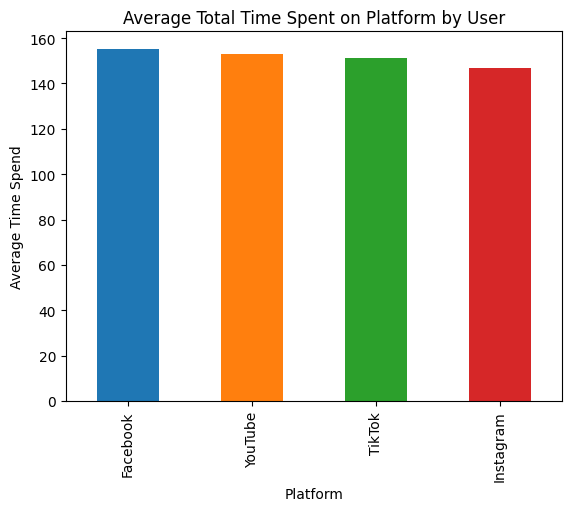

In [ ]:
data.groupby(['Platform'])['Total Time Spent'].mean().sort_values(ascending=False).plot(kind='bar',color= ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Average Total Time Spent on Platform by User')
plt.ylabel('Average Time Spend');

In [ ]:
data['Addiction Level'].value_counts()

,count
Addiction Level,
2,248
5,228
0,180
3,159
1,60
7,55
4,36
6,34


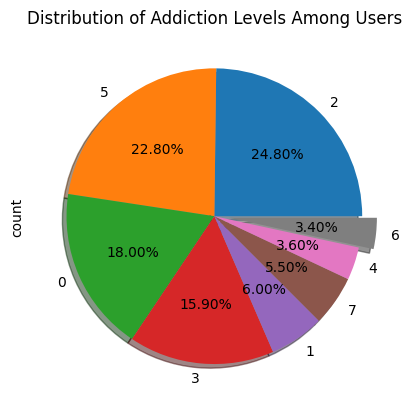

In [ ]:
data['Addiction Level'].value_counts().plot(kind='pie',explode=(0,0,0,0,0,0,0,0.1),shadow=True,autopct="%1.2f%%",title='Distribution of Addiction Levels Among Users');